# Iris data set
Using the iris data set to demonstrate different classification algorithms.

### Initial data exploration

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

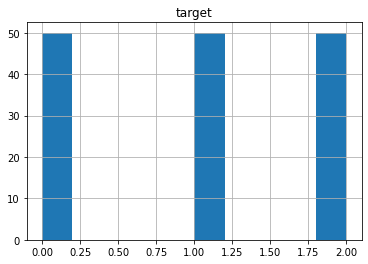

In [5]:
df.hist(column='target')

The target column is only 0,1,2 which corresponds to the target_names list as shown above. A species column will be added to make plotting easier.

In [6]:
conditions = [
    (df['target'] == 0.0),
    (df['target'] == 1.0),
    (df['target'] == 2.0)]
choices = ['setosa', 'versicolor', 'virginica']
df['Species']=np.select(conditions, choices, default=np.nan)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [7]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

### Data Visualisation

C:\Users\Andrew\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


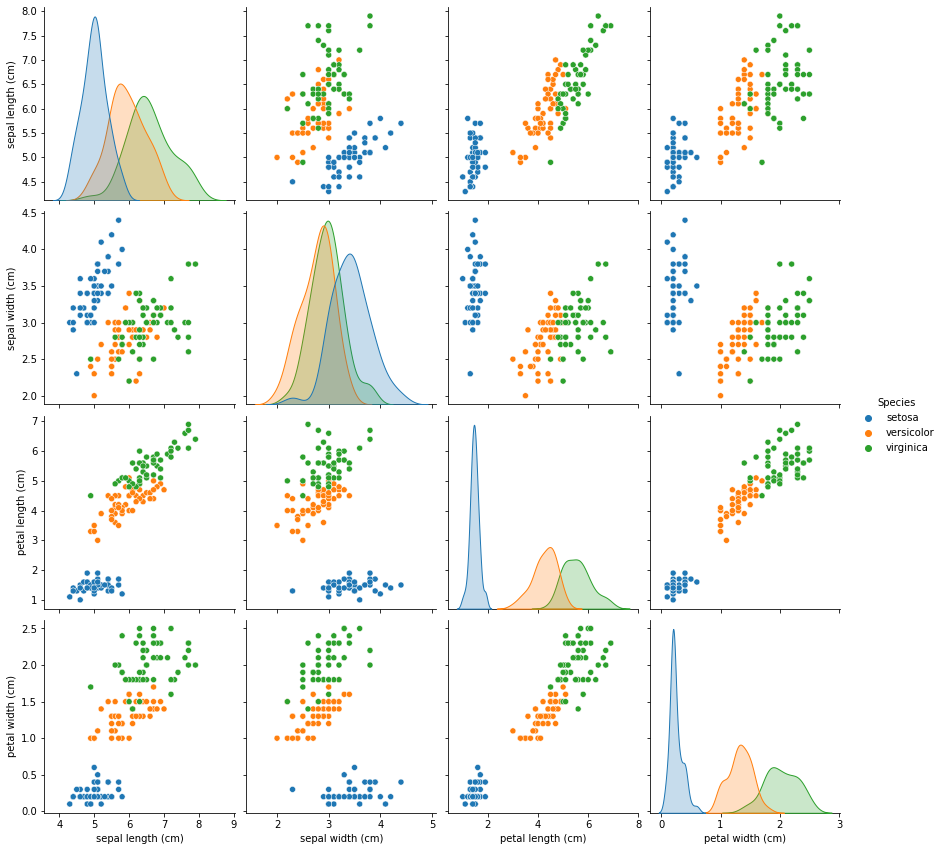

In [8]:
import seaborn as sns
sns.pairplot(df.drop("target", axis=1), hue="Species", size=3)

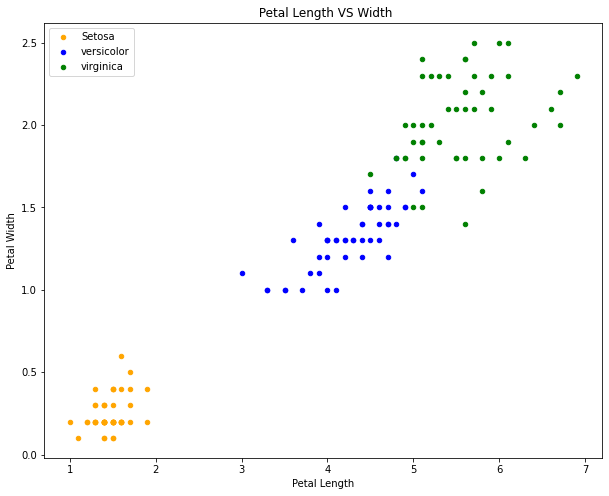

In [9]:
import matplotlib.pyplot as plt
ax1 = df[df.Species=='setosa'].plot.scatter(x='petal length (cm)',y='petal width (cm)',color='orange', label='Setosa',figsize=(10,8))
df[df.Species=='versicolor'].plot.scatter(x='petal length (cm)',y='petal width (cm)',color='blue', label='versicolor',ax=ax1)
df[df.Species=='virginica'].plot.scatter(x='petal length (cm)',y='petal width (cm)',color='green', label='virginica',ax=ax1)
ax1.set_xlabel("Petal Length")
ax1.set_ylabel("Petal Width")
ax1.set_title(" Petal Length VS Width")
plt.show()

## Machine Learning

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)

train_X=train[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
train_y=train.Species
test_X=test[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
test_y=test.Species

### k nearest neighbours

In [11]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_X, train_y)
yhat = neigh.predict(test_X)

In [12]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(train_y, neigh.predict(train_X)))
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat))

Train set Accuracy:  0.9428571428571428
Test set Accuracy:  1.0


The number of neighbours was only a random guess, to find the better value we can run multiple models and plot the accuracy for each k.

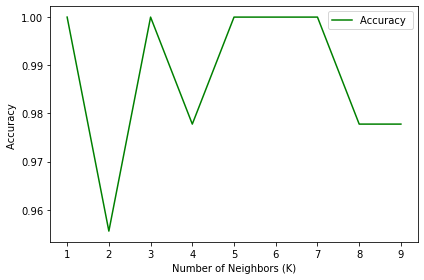

In [13]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(train_X,train_y)
    yhat=neigh.predict(test_X)
    mean_acc[n-1] = metrics.accuracy_score(test_y, yhat)
    std_acc[n-1]=np.std(yhat==test_y)/np.sqrt(yhat.shape[0])
mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
#plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

This shows that 7 is the best number

In [14]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(train_X, train_y)
yhat = neigh.predict(test_X)

In [15]:
print("Train set Accuracy: ", metrics.accuracy_score(train_y, neigh.predict(train_X)))
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat))

Train set Accuracy:  0.9714285714285714
Test set Accuracy:  1.0


Another metric that could be used is a f1 score

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(neigh,train_X,train_y,cv=3)
f1_score(train_y,y_train_knn_pred,average="macro")

0.9451951951951951

### Random Forest and Decision tree

In [17]:
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

detree=DecisionTreeClassifier(max_depth = 4)
detree.fit(train_X,train_y)
yhat=detree.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(yhat,test_y))

The accuracy of the Decision Tree is 0.9333333333333333


In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(train_X, train_y)
yhat=clf.predict(test_X)
print('The accuracy of the Random Forest is',metrics.accuracy_score(yhat,test_y))

The accuracy of the Random Forest is 0.9555555555555556


For the random forest I will also do the cross fold analysis. As they are all very high scores gives added faith to the model

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, train_X, train_y, cv=3, scoring="accuracy")

array([0.88571429, 0.91428571, 1.        ])

### Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 1.0


C:\Users\Andrew\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Explanations

**kNN**: This algorithm works by comparing a given point to a certain number of neighbours (k), it then assigns the new point the same as it’s the most common point in the nearest neighbours.                 
**Accuracy score** This uses the Jaccard index for multiclass classification. The Jaccard Index is essentially the number in both sets, divided by the number in either set, multiplied by 100.           
**f1 score** This is the harmonic mean of recall and precision score. Recall is true positive/true positive plus false negative. Precision is true positive/ true positive + false positive.          
**Random Forest** This constructs a number of decision trees and in the class the selection is the one outputted by the decision trees the most.           
**Decision Tree** Decision tree work by asking questions (e.g. female or male) and then divides the data up respectively. It then continues until a max depth is reached or the ends of the branches are pure.            
**Cross fold** The train data set is divided up into a number of folds. A model is then trained with all bar one fold and evaluated on that fold. This is repeated until all folds have been tested.           
**logistic Regression** This makes a model that is either pass or fail, it is inherently a binary classification but can be extended by making multi logistic regressions.             


# Clustering
This data set can also be used to start demonstrating simple clustering. I will use KMeans which defines a number of clusters, it will then assign a random centriod location. The first step assigns each sample to its nearest centroid. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly. I will first just look at 2 varibles and do the clustering

In [21]:
from sklearn.cluster import KMeans

#samples = iris.data
samples = df[['sepal length (cm)','sepal width (cm)']]
model = KMeans(n_clusters=3)
model.fit(samples)

labels = model.predict(samples)

new_samples = np.array([[5.7, 4.4],
   [6.5, 3. ],
   [5.8, 2.7]])

# Predict labels for the new_samples
new_labels = model.predict(new_samples)

print(new_labels)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


Now we have the model we can use it to make new predictions as shown abouve. It can also be useful to plot a graph of the 2 varibles with the clusters the colour.

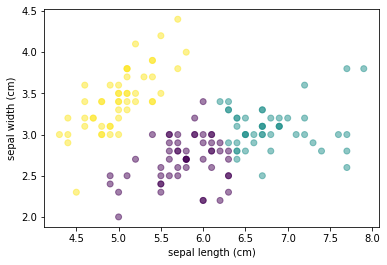

In [25]:
x = samples['sepal length (cm)']
y = samples['sepal width (cm)']

plt.scatter(x, y, c=labels, alpha=0.5)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()

### Evaluation
Now that we have made a module we need to confirm how well it performs. The first main problem to solve is how many clusters to chose. To do this we will use the elbow method, this runs the model a number of times and finds the inertia of the model. Inertia can be recognized as a measure of how internally coherent clusters are. It is then plotted and a good cluster number is where the plot starts to flatten. As shown in this plot you could say that 2 would also be a good value, we know that this is wrong as we havent used enough data.

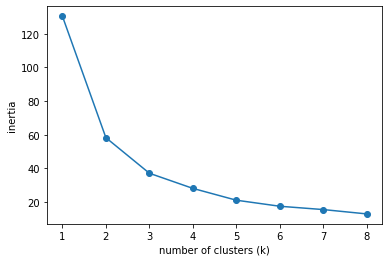

In [27]:
num_clusters = list(range(1, 9))
inertias = []

for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(samples)
  inertias.append(model.inertia_)
  
plt.plot(num_clusters, inertias, '-o')

plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')

plt.show()